# Final project for Python Programming course

## Prepared by Maksym Bilyi, id: 101169

### Executed using PyCharm, Jupyter Notebook, and GitHu


Following project intends to invetigate Airline reviews using data science and python. The basic idea is about clustering reviews based on people's text. However, project includes other various creative initiatives that explore the potential of algorithms, maths, and art of data science🤩

Dataset for the following project is on Kaggle: https://www.kaggle.com/rakshitrk/airline-reviews. Dataset contains more than 300k reviews of: Airline, Air Travel, Airport, Flight Search Sites, and Airport Shuttle Service. 

Codes, graphs, and other output will be followed by comments.

In [1]:
# list of used libraries 

import pandas as pd

In [2]:
# importing the dataset

ds = pd.read_csv('/Users/macbook/Desktop/PythonHW/reviews.csv')
ds.head()

,comment,rating,url_website,company_name,company_website,company_logo
0,"Mohammad harun, he is an awesome guy very info...",5,https://www.trustpilot.com/review/www.flydealf...,FlyDealFare.com,http://flydealfare.com?utm_medium=company_prof...,//s3-eu-west-1.amazonaws.com/tpd/logos/55a5e61...
1,"amazing guy gaurav was, so patience and kind. ...",5,https://www.trustpilot.com/review/www.flydealf...,FlyDealFare.com,http://flydealfare.com?utm_medium=company_prof...,//s3-eu-west-1.amazonaws.com/tpd/logos/55a5e61...
2,Gaurav was very knowledgeable and very helpful...,5,https://www.trustpilot.com/review/www.flydealf...,FlyDealFare.com,http://flydealfare.com?utm_medium=company_prof...,//s3-eu-west-1.amazonaws.com/tpd/logos/55a5e61...
3,I called them regarding my flight cancellation...,5,https://www.trustpilot.com/review/www.flydealf...,FlyDealFare.com,http://flydealfare.com?utm_medium=company_prof...,//s3-eu-west-1.amazonaws.com/tpd/logos/55a5e61...
4,VERY GOOD SERVICE BY GAURAV LOHAT SERVED AS SO...,4,https://www.trustpilot.com/review/www.flydealf...,FlyDealFare.com,http://flydealfare.com?utm_medium=company_prof...,//s3-eu-west-1.amazonaws.com/tpd/logos/55a5e61...


In [3]:
# for the research, there's no need to keep following variables

ds=ds.drop(columns=['url_website', 'company_website', 'company_logo'])
ds.head()

,comment,rating,company_name
0,"Mohammad harun, he is an awesome guy very info...",5,FlyDealFare.com
1,"amazing guy gaurav was, so patience and kind. ...",5,FlyDealFare.com
2,Gaurav was very knowledgeable and very helpful...,5,FlyDealFare.com
3,I called them regarding my flight cancellation...,5,FlyDealFare.com
4,VERY GOOD SERVICE BY GAURAV LOHAT SERVED AS SO...,4,FlyDealFare.com


# Data Preprocessing Stage

In [4]:
# missing data check

ds.isna().sum()

comment         0
rating          0
company_name    0
dtype: int64

In [5]:
# to see how average rating are distributed among companies

ds.groupby("company_name").rating.mean().sort_values(ascending=True)


company_name
Le Bus Direct              1.000000
Primera Air                1.348259
Vueling                    1.349120
AirAsia                    1.364641
wizzair.com                1.378788
                             ...   
Lderex Travels             5.000000
Flights Booth              5.000000
TravellerClick             5.000000
Flight Squad               5.000000
Priority One Jets, Inc.    5.000000
Name: rating, Length: 150, dtype: float64

In [6]:
# to see how many unique levels we have in the dataset

len(ds.company_name)


308384

In [7]:
# to determine what airlines have the most reviews

ds.groupby("company_name").comment.count().sort_values(ascending=True)

# for the following project I will use first 5 with most reviews

company_name
Escape Flight                          1
Advanced Air Ambulance                 1
Flight Squad                           1
Frdesk                                 1
Penny Fly Travel                       1
                                   ...  
AirportParkingReservations.com     17928
SmartFares                         24447
WallyPark Airport Parking          27390
Kiwi.com                           36389
JustFly                           100320
Name: comment, Length: 150, dtype: int64

In [8]:
# filtering Airline companies with less than 17927 reviews, so keeping top-5

counts = ds.groupby("company_name").comment.count()
ds1 = ds[~ds['company_name'].isin(counts[counts < 17927].index)]

In [9]:
ds1.groupby("company_name").comment.count().sort_values(ascending=True)

company_name
AirportParkingReservations.com     17928
SmartFares                         24447
WallyPark Airport Parking          27390
Kiwi.com                           36389
JustFly                           100320
Name: comment, dtype: int64

<AxesSubplot:xlabel='company_name'>

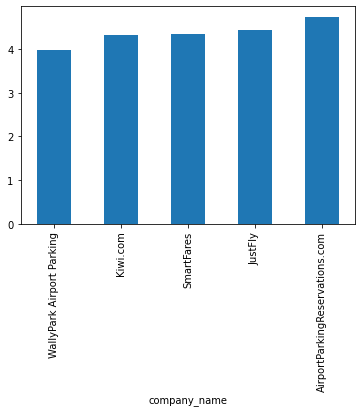

In [10]:
# analyzing average ratings among companies

ds1.groupby("company_name").rating.mean().sort_values(ascending=True)[:5].plot.bar()

# based on mean values, the "best" one is JustFly and the "worst" one is WallyPark

In [11]:
pd.options.mode.chained_assignment = None

In [12]:
# to see average amount of words in each reviews in each company

#ds1['word_count'] = ds1['comment'].apply(lambda x: len(str(x).split(" ")))


#ds1.groupby("company_name").word_count.mean().sort_values(ascending=False)[:5]

# Text Analysis Stage

In [13]:
# making lower case to avoid repetitions of same words

ds1['comment'] = ds1['comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [14]:
# removing punctuation

ds1['comment'] = ds1['comment'].str.replace('[^\w\s]','')

In [23]:
# tokenization 


from nltk.tokenize import word_tokenize

ds1['comment'].dropna(inplace=True)

tokens = ds1['comment'].apply(word_tokenize)

In [25]:
tokens.head()

203    [we, got, cheap, covered, parking, close, to, ...
218    [great, service, to, and, from, the, airport, ...
219    [great, location, pick, up, and, drop, off, wa...
220    [was, very, easy, and, simple, to, navigate, o...
221    [the, bus, was, on, time, and, clean, my, only...
Name: comment, dtype: object